In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
rawData = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\13. school\\xAPI-Edu-Data.csv')

In [6]:
# 불필요한 변수들 정리
drop_columns = ['NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', ]
x = rawData.drop(columns=drop_columns)

In [7]:
# 범주형 자료는 더미변수로 변환
cat_columns = ['gender', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', ]
x = pd.get_dummies(data=x, columns=cat_columns)

In [8]:
x

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,M,0,1,1,0,0,1,0,1,0,1
1,20,20,3,25,M,0,1,1,0,0,1,0,1,0,1
2,10,7,0,30,L,0,1,1,0,1,0,1,0,1,0
3,30,25,5,35,L,0,1,1,0,1,0,1,0,1,0
4,40,50,12,50,M,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,L,1,0,1,0,1,0,1,0,1,0
476,50,77,14,28,M,1,0,1,0,1,0,1,0,0,1
477,55,74,25,29,M,1,0,1,0,1,0,1,0,0,1
478,30,17,14,57,L,1,0,1,0,1,0,1,0,1,0


In [9]:
y = x['Class']
x = x.drop(columns='Class')

In [10]:
y

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
folds = StratifiedKFold(n_splits=5, random_state=True, shuffle=True)
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Master\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.score(x_test, y_test)

0.7708333333333334

In [17]:
model.predict(x_test)

array(['M', 'L', 'L', 'H', 'M', 'M', 'M', 'H', 'H', 'M', 'H', 'M', 'M',
       'L', 'M', 'H', 'M', 'L', 'M', 'H', 'M', 'H', 'M', 'M', 'L', 'H',
       'H', 'L', 'L', 'M', 'L', 'H', 'L', 'M', 'M', 'M', 'M', 'H', 'M',
       'H', 'L', 'L', 'H', 'M', 'L', 'M', 'H', 'H', 'H', 'L', 'L', 'L',
       'L', 'M', 'M', 'L', 'L', 'H', 'M', 'H', 'H', 'H', 'L', 'L', 'L',
       'H', 'L', 'H', 'M', 'M', 'H', 'L', 'H', 'H', 'M', 'M', 'H', 'H',
       'H', 'L', 'M', 'M', 'L', 'L', 'M', 'L', 'H', 'L', 'L', 'L', 'H',
       'H', 'L', 'M', 'H', 'H', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L',
       'M', 'M', 'M', 'H', 'L', 'M', 'M', 'M', 'M', 'H', 'M', 'H', 'L',
       'H', 'L', 'M', 'H', 'L', 'M', 'H', 'M', 'L', 'L', 'M', 'H', 'M',
       'H', 'M', 'M', 'M', 'M', 'L', 'H', 'M', 'H', 'L', 'L', 'H', 'M',
       'M'], dtype=object)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
yhat_train = model.predict(x_train)
yaht_test = model.predict(x_test)

In [21]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           H       0.74      0.69      0.72       100
           L       0.86      0.87      0.87        85
           M       0.73      0.76      0.75       151

    accuracy                           0.77       336
   macro avg       0.78      0.77      0.78       336
weighted avg       0.77      0.77      0.77       336



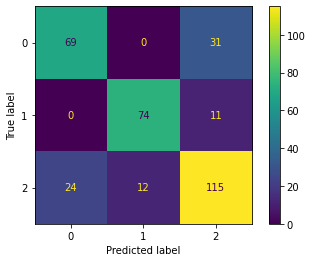

In [27]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, yhat_train),).plot()

In [26]:
y_train

165    H
280    H
175    L
131    M
278    M
      ..
89     L
55     L
349    L
83     M
329    M
Name: Class, Length: 336, dtype: object

In [28]:
import eli5

In [29]:
from eli5.sklearn import PermutationImportance

In [30]:
eli5.show_weights(model, feature_names = x.columns.tolist())

In [41]:
#Encoded Y variable
from sklearn import preprocessing

In [42]:
encoder = preprocessing.LabelEncoder()
y_train_label_encode = encoder.fit_transform(y_train)
y_test_label_encode = encoder.fit_transform(y_test)

In [43]:
model = LogisticRegression(max_iter=100000000).fit(x_train, y_train_label_encode)

In [49]:
encoder.classes_

array(['H', 'L', 'M'], dtype=object)

In [50]:
encoder.classes_[0]

'H'

In [51]:
encoder.classes_[1]

'L'

In [52]:
encoder.classes_[2]

'M'

In [55]:
y_train

165    H
280    H
175    L
131    M
278    M
      ..
89     L
55     L
349    L
83     M
329    M
Name: Class, Length: 336, dtype: object

In [53]:
y_train_label_encode

array([0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0,
       2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,

In [44]:
yhat_train = model.predict(x_train)
yhat_test = model.predict(x_test)

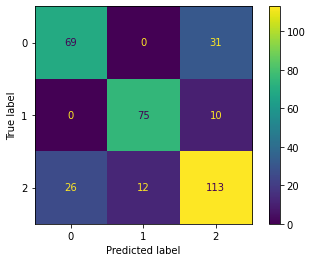

In [45]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_label_encode, yhat_train),).plot()

In [46]:
eli5.show_weights(model, feature_names = x.columns.tolist())